In [171]:
%matplotlib inline

In [172]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as stats

In [173]:
#load data
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [174]:
#establish data frames
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Clean the data

In [175]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [176]:
# get all of the columns that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [177]:
#Determine data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [178]:
# how many data points per type of city 

#make and array of types
city_data_df["type"].unique()

#get the number of data points
sum(city_data_df["type"]=="Rural")

18

In [179]:
#Rinse and repeat for ride data

In [180]:
#count the columns
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [181]:
#number of columns and rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [182]:
#data types for the columns
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## merge the data frame

In [183]:
#Merge the data frames
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# create the DataFrames

In [184]:
# create the Urban city data Frame

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [185]:
# create the Suburban city data Frame

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

In [186]:
#create the Rural city data Frame

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


# Create the Variables

In [187]:
# Get the number of rides per type of city
#Urban
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [188]:
#Suburban
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

In [189]:
#Rural
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [190]:
#get the average fare per city

In [191]:
#urban avg fare

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [192]:
#suburban
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

In [193]:
#rural
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [194]:
# average number of drivers per city type

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [195]:
#suburban
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

In [196]:
#rural
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

# Create the bubble chart

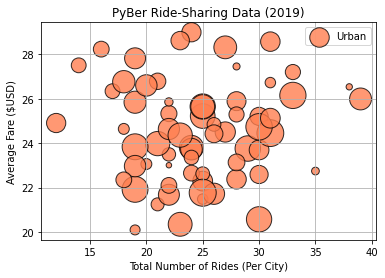

In [197]:
#build a scatter plot

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s = 10*urban_driver_count,
            c = "coral",
            edgecolor = "black", linewidth = 1,
            alpha = 0.8, 
            label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($USD)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

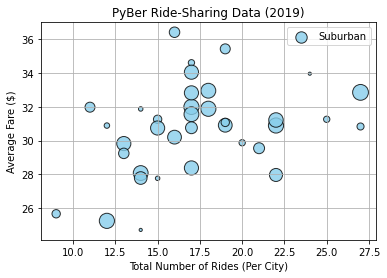

In [198]:
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s= 10* suburban_driver_count,
           c = "skyblue",
           edgecolor ="black",
           linewidths = 1,
           alpha = 0.8,
           label = "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

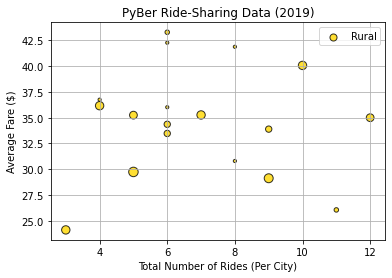

In [199]:
plt.scatter(rural_ride_count, 
           rural_avg_fare,
           s = 10* rural_driver_count,
           c = "gold",
           edgecolor = "black",
           linewidths = 1,
           alpha = 0.8,
           label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

In [200]:
# combine the charts

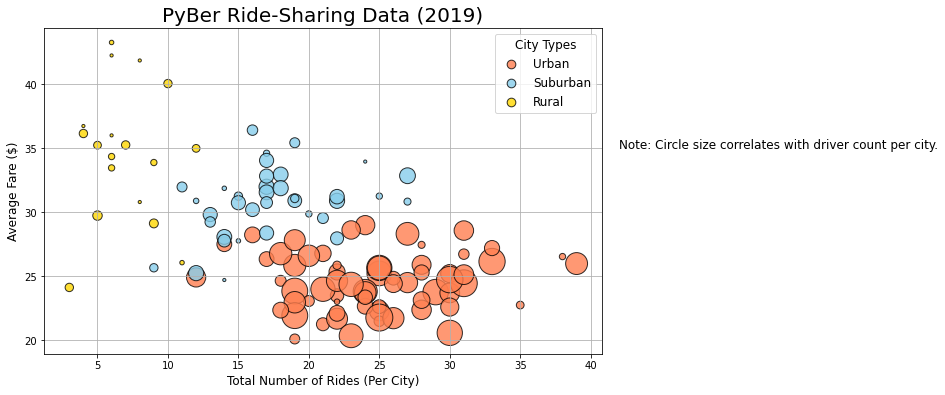

In [201]:
#add the scatter plots for each city type 
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s = 10*urban_driver_count,
            c = "coral",
            edgecolor = "black", linewidth = 1,
            alpha = 0.8, 
            label = "Urban")
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s= 10* suburban_driver_count,
           c = "skyblue",
           edgecolor ="black",
           linewidths = 1,
           alpha = 0.8,
           label = "Suburban")
plt.scatter(rural_ride_count, 
           rural_avg_fare,
           s = 10* rural_driver_count,
           c = "gold",
           edgecolor = "black",
           linewidths = 1,
           alpha = 0.8,
           label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

lgnd = plt.legend(fontsize = "12", 
                  mode = "Expanded",
                  scatterpoints = 1,
                  loc = "best",
                  title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#add a note for the reader

plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#save the fig
plt.savefig("analysis/Fig1.png")

plt.show()

# Summary Statistics

In [202]:
#get summary stats

urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [203]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [204]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [205]:
# Calculate JUST the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [206]:
# Calculate JUST the mean of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [207]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [208]:
suburban_ride_count.mode()

0    17
dtype: int64

# Alternate method: for when not us Jupyter

In [209]:
import numpy as np
import scipy.stats as sts

In [210]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [211]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [212]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [213]:
#summary stats for fare by city

In [214]:
urban_fares =  urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [215]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [216]:
suburban_fares =  suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [217]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [218]:
rural_fares =  rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [219]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [220]:
# Summary Stats for the Number of Drives by city type

In [221]:
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [222]:
# Calculate the measures of central tendency for the number of drivers for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers per city is{mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of urban drivers ${median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of urban drivers is {mode_urban_drivers}.")

The mean number of drivers per city is36.68.
The median number of urban drivers $37.00.
The mode number of urban drivers is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [223]:
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [224]:
# Calculate the measures of central tendency for the number of drivers for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of suburban drivers is{mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of suburban drivers ${median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of suburban drivers is {mode_suburban_drivers}.")

The mean number of suburban drivers is13.71.
The median number of suburban drivers $16.00.
The mode number of suburban drivers is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [225]:
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [226]:
# Calculate the measures of central tendency for the number of drivers for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of rural drivers is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of rural drivers ${median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of rural drivers is {mode_rural_drivers}.")

The mean number of rural drivers is 4.30.
The median number of rural drivers $4.00.
The mode number of rural drivers is ModeResult(mode=array([1], dtype=int64), count=array([32])).


# Box and Whisker plots for outliers

<function matplotlib.pyplot.show(close=None, block=None)>

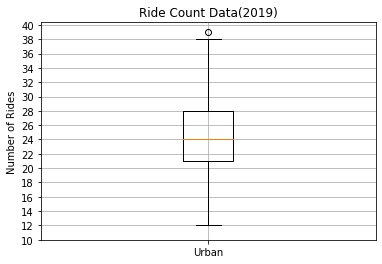

In [227]:
#create a box and whisker plot
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

#add the title,labels

ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step= 2.0))
ax.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

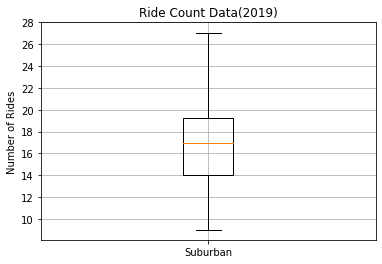

In [228]:
#create a box and whisker plot suburban cities
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels)

#add the title,labels

ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,30, step= 2.0))
ax.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

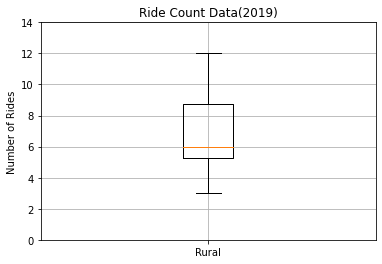

In [229]:
#create a box and whisker plot
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)

#add the title,labels

ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0,16, step= 2.0))
ax.grid()
plt.show

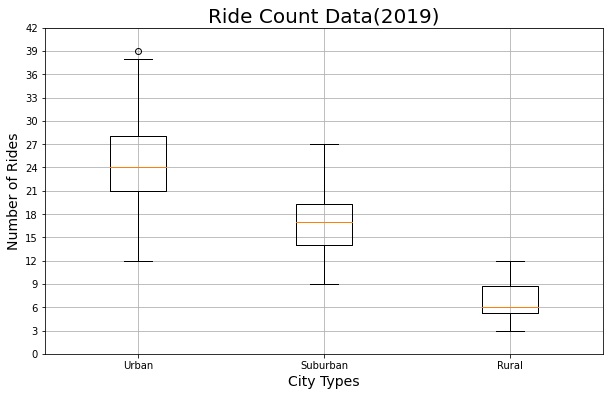

In [263]:
#combine to make cat
x_labels = ["Urban","Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title('Ride Count Data(2019)', fontsize = 20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0,45, step = 3.0))
ax.grid()
plt.savefig("analysis/Fig2.png")
plt.show()

In [231]:
# Identify the Outliers

urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count")

West Angela has the highest rider count


In [232]:
#Box and Whisker for Ride fare data

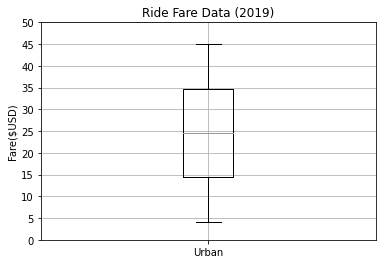

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [233]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

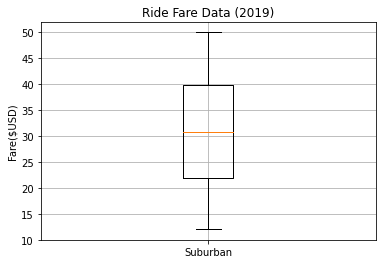

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [234]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(10, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

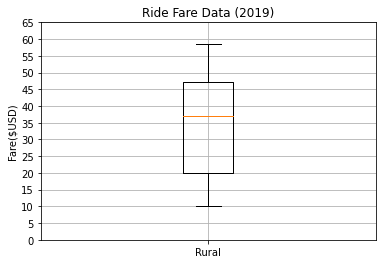

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [235]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 70, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

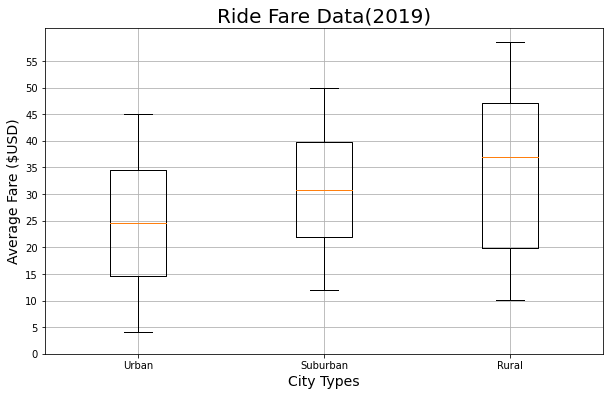

In [264]:
#Create the Cat
x_labels = ["Urban","Suburban", "Rural"]
ride_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title('Ride Fare Data(2019)', fontsize = 20)
ax.set_ylabel('Average Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0,60 , step = 5.0))
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()

In [237]:
# Box and Whisker for Driver count data

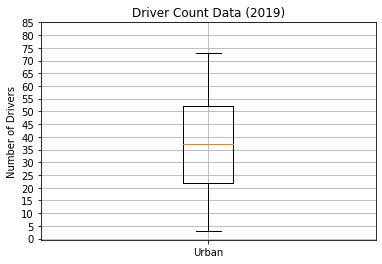

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [238]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

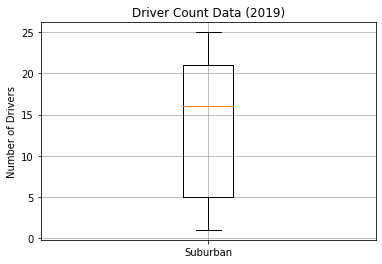

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [239]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 30, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

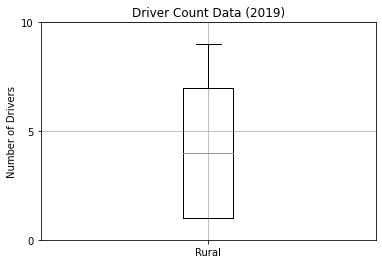

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [240]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 15, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

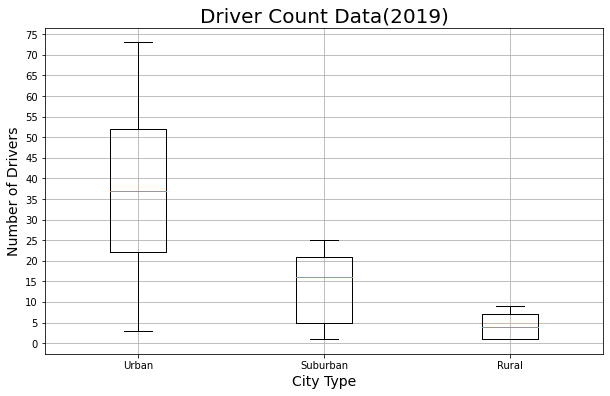

In [265]:
#Create the Cat
x_labels = ["Urban","Suburban", "Rural"]
ride_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title('Driver Count Data(2019)', fontsize = 20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Type",fontsize=14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0,80, step = 5.0))
ax.grid()
plt.savefig("analysis/Fig4.png")
plt.show()

# Percentages and Pie charts

In [256]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [243]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [ ]:
fare 

In [279]:
# Calculate the percentage of fare for each city type.
fares_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
fares_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [262]:
import matplotlib as mpl

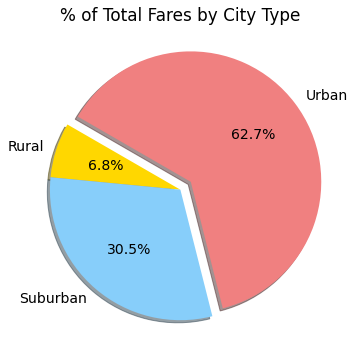

In [267]:
# Build the percentage of fares by city type pie chart.
plt.subplots(figsize = (10,6))
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold","lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct='%1.1f%%', 
       shadow = True,
       startangle = 150)
plt.title("% of Total Fares by City Type")
#change the default font size from 10 to 14
mpl.rcParams['font.size'] = 16
plt.savefig("analysis/Fig5.png")
plt.show()

In [282]:
pyber_data_df.groupby(["type"])

In [283]:
pyber_data_df["ride_id"].count()

2375

In [284]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

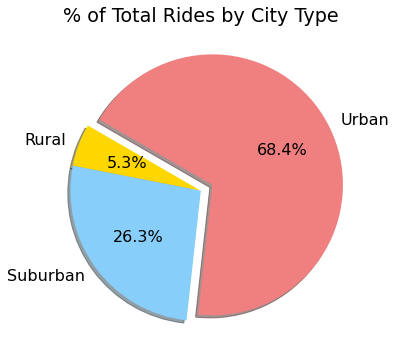

In [285]:
# Build the percentage of total rides by city type pie chart.
plt.subplots(figsize = (10,6))
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold","lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct='%1.1f%%', 
       shadow = True,
       startangle = 150)
plt.title("% of Total Rides by City Type")
#change the default font size from 10 to 14
mpl.rcParams['font.size'] = 16
plt.savefig("analysis/Fig6.png")
plt.show()

In [286]:
# Get the sum of total drivers per city.
sum_drivers_by_type = pyber_data_df.groupby(["type"]).sum()["driver_count"]

# Get the sum of all the fares.
total_drivers = pyber_data_df["driver_count"].sum()

# Calculate the percentage of fare for each city type.
driver_percents = 100 *
city_data_df.groupby(["type"]).sum()["driver_count"] /
city_data_df["driver_count"].sum()
driver_percents

SyntaxError: invalid syntax (2940636786.py, line 8)

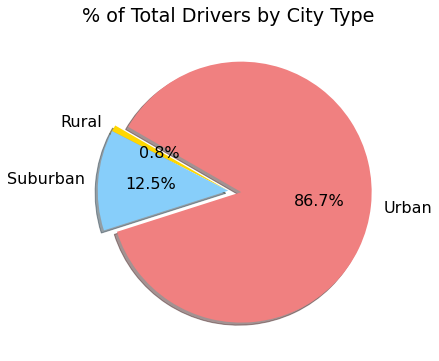

In [278]:
# Build the percentage of fares by city type pie chart.
plt.subplots(figsize = (10,6))
plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold","lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct='%1.1f%%', 
       shadow = True,
       startangle = 150)
plt.title("% of Total Drivers by City Type")
#change the default font size from 10 to 14
mpl.rcParams['font.size'] = 16
plt.savefig("analysis/Fig7.png")
plt.show()